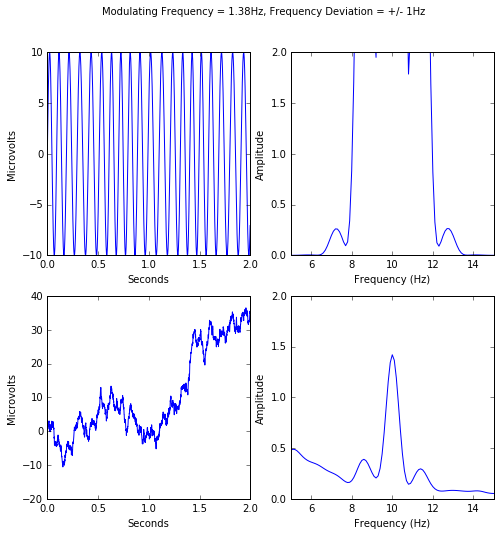

In [ ]:
%pylab inline

import scipy as sp
import scipy.io 
import scipy.signal as signal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import os
import pylab as pl
from IPython import display    
import alpha as a


dataLengthSecs = 120
sampleRate = 1024
sampleSpacing = 1.0 / sampleRate
alphaCenter = 10
dataLengthSamples = dataLengthSecs*sampleRate
desiredFreqResolution = 0.1 # Predefine resolution of spectrum
fftLengthSamples = int(sampleRate/desiredFreqResolution) # Depends on sample rate and desired resolution only
t = np.reshape(np.arange(0,dataLengthSecs,sampleSpacing), ((dataLengthSamples)))

alphaFreqDev = 1
modFreqStepSize = 0.01
maxModFreq = 2
#foldername = 'Dev_'+str(alphaFreqDev)+'Step_'+str(modFreqStepSize)

for (figIndex,alphaModFreq) in enumerate(np.arange(modFreqStepSize,maxModFreq,modFreqStepSize)):
#     simulatedEEG = a.alpha_noisy(dataLengthSamples, sampleRate)
#     groundTruth = a.alpha(dataLengthSamples, sampleRate, 10)
    simulatedEEG = a.FM_noisy(dataLengthSamples, sampleRate,alphaCenter, alphaModFreq, alphaFreqDev)
    groundTruth = a.FM(dataLengthSamples, sampleRate, alphaCenter, alphaModFreq, alphaFreqDev, 10)
    fig1 = plt.figure(figsize=(8,8))
    title = 'Modulating Frequency = '+str(alphaModFreq)+'Hz, Frequency Deviation = +/- '+str(alphaFreqDev)+'Hz'
    
    plt.suptitle(title)
    
    plt.subplot(2,2,1)
    plt.plot(t[0:2*sampleRate],groundTruth[0:2*sampleRate])
    plt.ylabel('Microvolts')
    plt.xlabel('Seconds')

    plt.subplot(2,2,3)
    plt.plot(t[0:2*sampleRate],simulatedEEG[0:2*sampleRate])
    plt.ylabel('Microvolts')
    plt.xlabel('Seconds')

    plt.subplot(2,2,2)
    f,pspec = sp.signal.welch(groundTruth, fs=sampleRate, window='hanning', nperseg=2*sampleRate, noverlap=sampleRate/2, nfft=fftLengthSamples, detrend='linear', return_onesided=True, scaling='density')
    plt.plot(f,pspec)
    plt.xlim([5, 15])
    plt.ylim([0, 2])
    plt.ylabel('Amplitude')
    plt.xlabel('Frequency (Hz)')

    plt.subplot(2,2,4)
    f,pspec = sp.signal.welch(simulatedEEG, fs=sampleRate, window='hanning', nperseg=2*sampleRate, noverlap=sampleRate/2, nfft=fftLengthSamples, detrend='linear', return_onesided=True, scaling='density')
    plt.plot(f,pspec)
    plt.xlim([5, 15])
    plt.ylim([0, 2])
    plt.ylabel('Amplitude')
    plt.xlabel('Frequency (Hz)')
    
    display.clear_output(wait=True)
    display.display(pl.gcf())
    #fig1.savefig(str(figIndex).zfill(2)+'.jpg')
    time.sleep(0.1)
    
        